In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import pickle
from utils.generic import get_dataset
import numpy as np

## CIFAR100

In [14]:
# load the image data
dataset="cifar100"
root="./data/"
target_set = get_dataset(dataset, root=root, train=True, fitr=None)
x=target_set.x

Files already downloaded and verified


In [15]:
# load the noise
with open(f"./8u4d/{dataset}/noise.pkl", 'rb') as f:
    delta = pickle.load(f)
delta = delta.astype(np.int16)
noise = delta * (125/8) + 125
noise = noise.astype(np.uint8)
''' restore noise (NCWH) for raw images (NHWC) '''
noise = np.transpose(noise, [0, 2, 3, 1]).astype(np.uint8)

FileNotFoundError: [Errno 2] No such file or directory: './8u4d/cifar100/noise.pkl'

NameError: name 'noise' is not defined

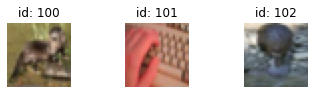

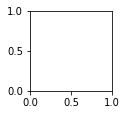

In [ ]:
i = 0
offset = 100
col=3
row=3
for i in np.arange(1,1+col):  
    plt.subplot(row, col, i)
    plt.imshow(x[i+offset-1])
    plt.title("id: "+str(i+offset-1))
    plt.axis('off')
plt.figure(figsize=(5,5))
for i in np.arange(1,1+col):  
    plt.subplot(row, col, col+i)
    plt.imshow(noise[i+offset-1])
    # plt.title("id: "+str(i+offset-1))
    plt.axis('off')


## CIFAR10

In [16]:
# load the image data
dataset="cifar10"
root="./data/"
target_set = get_dataset(dataset, root=root, train=True, fitr=None)
x=target_set.x
# load the noise
with open(f"./8u4d/{dataset}/noise.pkl", 'rb') as f:
    delta = pickle.load(f)
delta = delta.astype(np.int16)
noise = delta * (125/8) + 125
noise = noise.astype(np.uint8)
''' restore noise (NCWH) for raw images (NHWC) '''
noise = np.transpose(noise, [0, 2, 3, 1]).astype(np.uint8)
i = 0
offset = 100
col=3
row=3
plt.figure(figsize=(5,5))


for i in np.arange(1,1+col):  
    plt.subplot(row, col, i)
    plt.imshow(x[i+offset-1])
    plt.title("id: "+str(i+offset-1))
    plt.axis('off')
for i in np.arange(1,1+col):  
    plt.subplot(row, col, col+i)
    plt.imshow(noise[i+offset-1])
    # plt.title("id: "+str(i+offset-1))
    plt.axis('off')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


## ImageNet-Three-Classes-Subset

In [16]:
# load the image data
from utils.imagenet_utils import get_dataset
import pickle
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import os

def datasetImageNet(root='./data', train=True, transform=None):
    if train: root = os.path.join(root, 'train')
    else: root = os.path.join(root, 'val')
    return torchvision.datasets.ImageFolder(root=root, transform=transform)


def datasetImageNetKClass(root='./data', train=True, transform=None, k=3):
    dataset = datasetImageNet(root=root, train=train, transform=transform)
    ''' imagenet-ten-class is a subset of the k classes of ImageNet '''
    idx = np.where( np.array(dataset.targets) < k )[0]
    dataset.samples = [ dataset.samples[ii] for ii in idx ]
    dataset.targets = [ dataset.targets[ii] for ii in idx ]
    dataset.classes=k
    return dataset

# import Image
from PIL import Image

def load_data_to_array(idx=0):
    x,y = target_set.samples[idx]
    # x is the jpg file path, we seek to load the image as numpy array
    with open(x, 'rb') as f:
        img = Image.open(f)
        # crop the image to 224x224
        img = img.resize((256,256))
        img = img.convert('RGB')
    return np.array(img), y

dataset="imagenet-three-class"
root="/data/imagenet/"
# target_set = get_dataset(dataset, root=root, train=True, args=None)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(), 
            transforms.ToTensor(),
            # transforms.Normalize((0.5, 0.5, 0.5), (1., 1., 1.))
])

target_set = datasetImageNetKClass(root=root, train=True, transform=transform,k=3)
X = [load_data_to_array(idx=idx)[0] for idx in np.arange(len(target_set.samples))]
y = [load_data_to_array(idx=idx)[1] for idx in np.arange(len(target_set.samples))]

FileNotFoundError: [Errno 2] No such file or directory: '/data/imagenet/train'

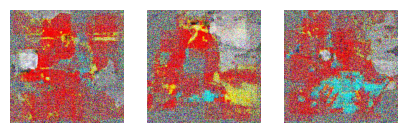

In [19]:

dataset="imagenet-three-class"
root="/data/imagenet/"
# load the noise
with open(f"./8u4d/{dataset}/noise.pkl", 'rb') as f:
    delta = pickle.load(f)
delta = delta.astype(np.int16)
noise = delta * (125/8) + 125
noise = noise.astype(np.uint8)
''' restore noise (NCWH) for raw images (NHWC) '''
noise = np.transpose(noise, [0, 2, 3, 1]).astype(np.uint8)
i = 0
offset = 100
col=3
row=3
plt.figure(figsize=(5,5))

for i in np.arange(1,1+col):  
    plt.subplot(row, col, i)
    # plt.imshow(x[i+offset-1])
    x,y= load_data_to_array(i+offset-1)
    plt.imshow(x)
    plt.title("id: "+str(i+offset-1))
    plt.axis('off')
for i in np.arange(1,1+col):  
    plt.subplot(row, col, i+col)
    plt.imshow(noise[i+offset-1])
    # plt.title("id: "+str(i+offset-1))
    plt.axis('off')